In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure aesthetics
sns.set_style("white", {'ytick.major.size': 10.0})
sns.set_context("poster", font_scale=1.1)

In [7]:
df = pd.read_parquet('../data/processed/features.parquet')
df.shape

(275547, 1105)

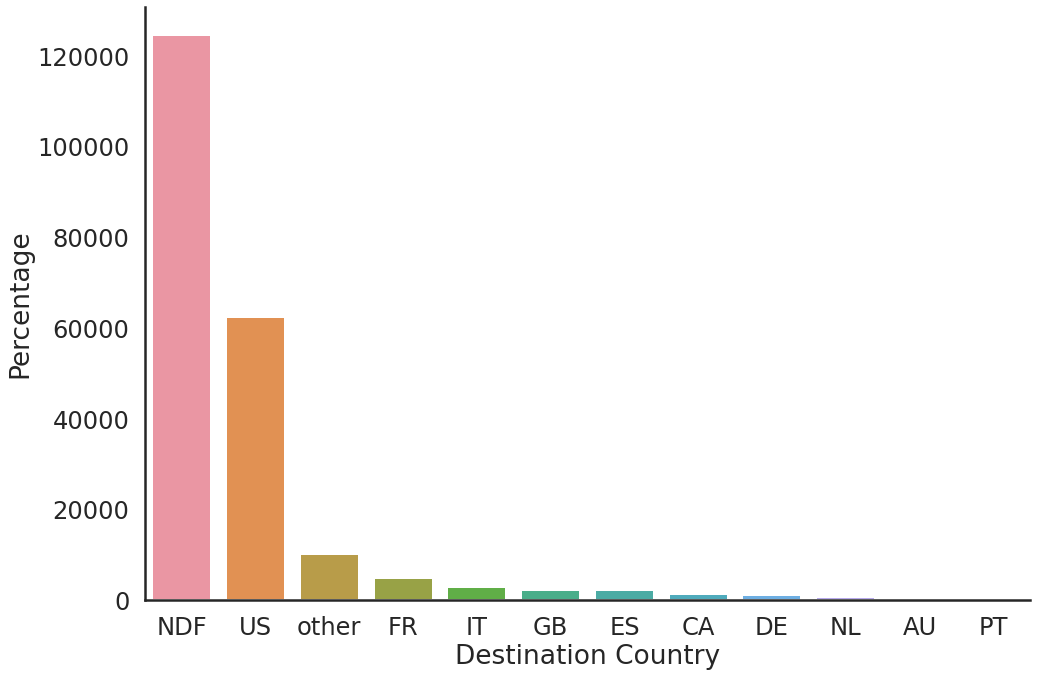

In [17]:
plt.figure(figsize=(15, 10))
sns.countplot(x="country_destination", data=df, order=list(df.country_destination.value_counts().keys()))
plt.xlabel('Destination Country')
plt.ylabel('Percentage')
plt.tight_layout()
sns.despine()

In [155]:
def plot_groups_vs_target(df, groups, label, target, colors=['#4DD3C9', '#FFA35D'], width=0.5):
    group_sums = [sum(df[label] == group) for group in groups]
    target_groups = [df.loc[df[label] == group, target].value_counts() / group_sum * 100 for group, group_sum in zip(groups, group_sums)]
    
#     width = width / (len(groups) - 1)
    plt.figure(figsize=(15, 10))
    for i, (target_group, color, group) in enumerate(zip(target_groups, colors, groups)):
        target_group.plot(kind='bar', width=width, color=color, position=i, label=group, rot=0)
    
    plt.legend()
    plt.xlabel(target)
    plt.ylabel('Percentage')

    sns.despine()
    plt.show()

In [156]:
groups = ['MALE', 'FEMALE']
label = 'gender'
target = 'country_destination'
colors=['#4DD3C9', '#FFA35D']

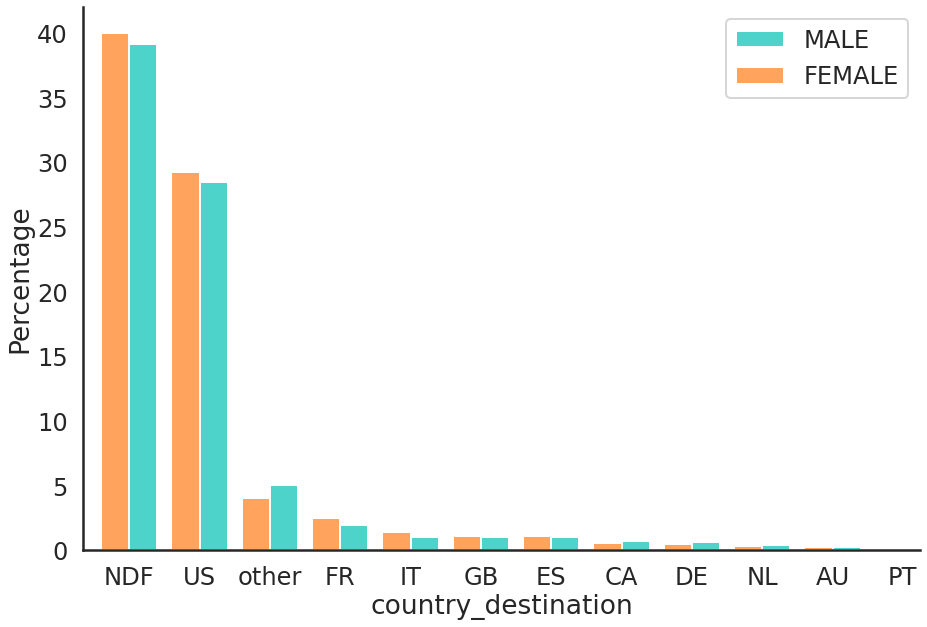

In [157]:
plot_groups_vs_target(df, groups, label, target, colors=colors, width=0.4)

In [151]:
import matplotlib._color_data as mcd

In [82]:
groups = list(range(2010, 2012))
label = 'year_registered'
target = 'country_destination'
colors=["#000000", "#FFFF00", "#1CE6FF",] #  "#FF34FF", "#FF4A46"]

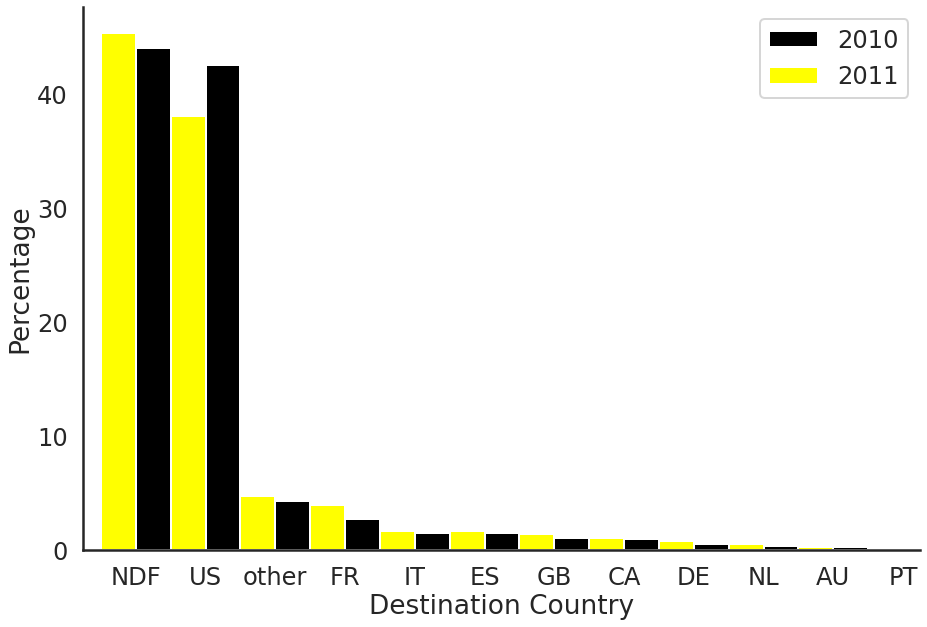

In [83]:
plot_groups_vs_target(df, groups, label, target, colors=colors)

In [124]:
groups = list(range(2010, 2015))
label = 'year_registered'
target = 'country_destination'
colors=["#6699CC", "#FFF275", "#FF8C42", "#FF3C38", "#A23E48"]

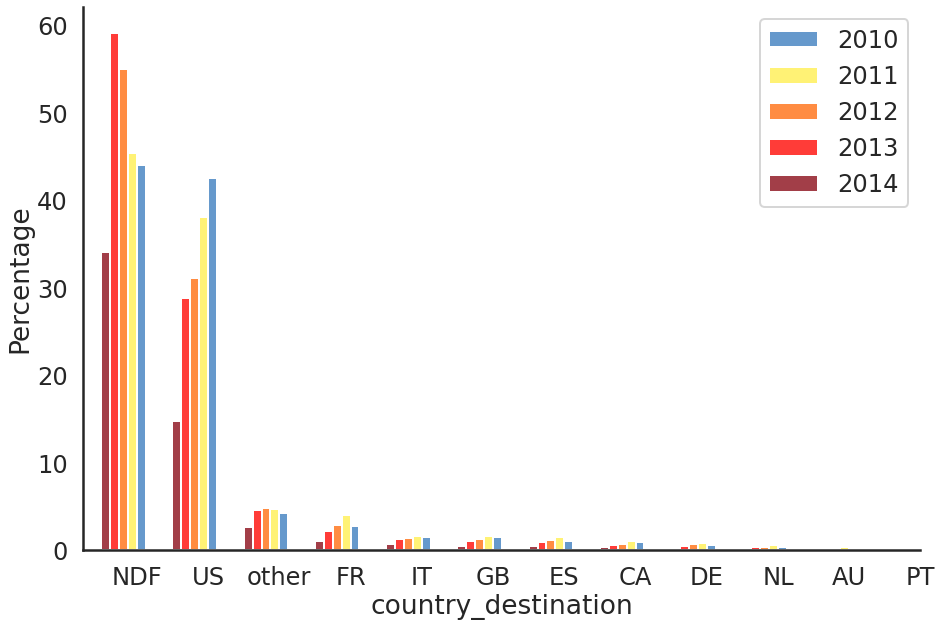

In [125]:
plot_groups_vs_target(df, groups, label, target, colors=colors)

In [168]:
df.age_group.unique()

array([0, 4, 6, 5, 3, 1, 2, 7, 9, 8])

In [171]:
groups = [0, 4, 6, 5, 3, 1, 2, 7, 9, 8]
label = 'age_group'
target = 'country_destination'
colors=["#6699CC", "#FFF275", "#FF8C42", "#FF3C38", "#A23E48", "#06d6a0", "#ff006e", "#d4d700", "#00bbf9"]

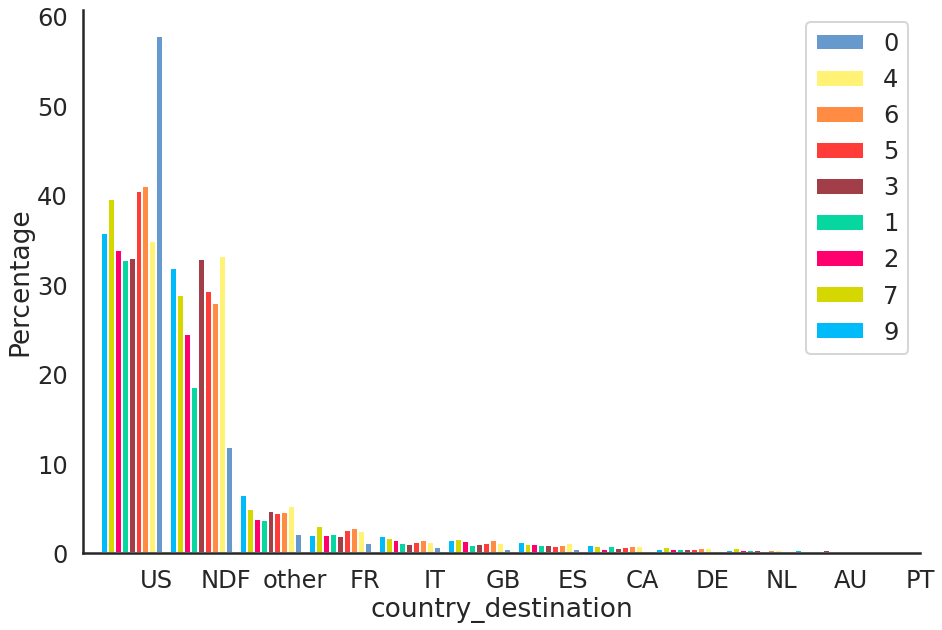

In [174]:
plot_groups_vs_target(df, groups, label, target, colors=colors, width=0.1)

In [114]:
df[df.train_flag == 1].month_registered.value_counts()

6     27422
5     25912
4     21867
3     20325
1     17495
2     16582
9     15395
8     14611
7     13832
10    13476
12    13405
11    13129
Name: month_registered, dtype: int64

In [115]:
df[df.train_flag == 0].month_registered.value_counts()

7    21696
8    21626
9    18774
Name: month_registered, dtype: int64

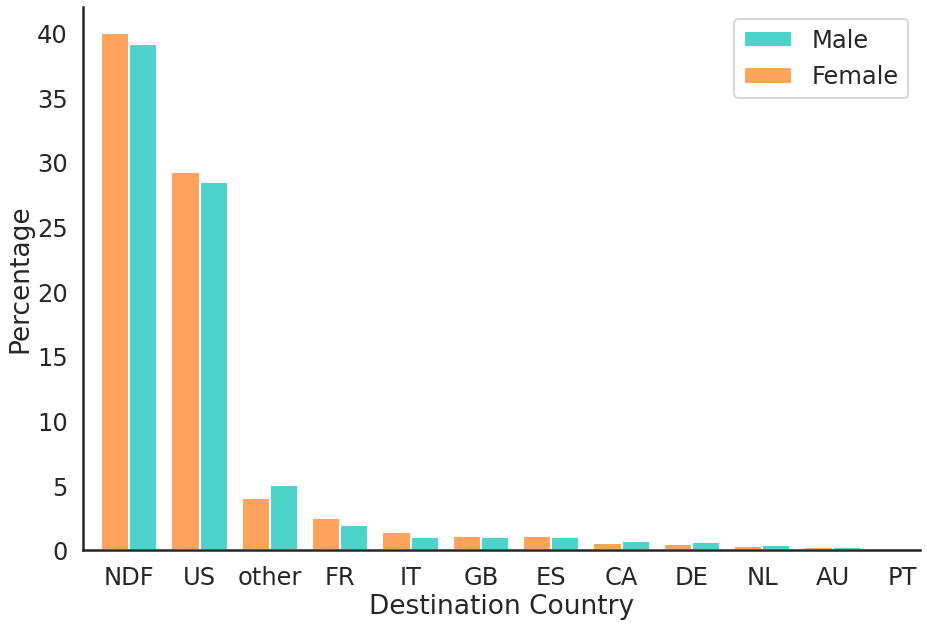

In [22]:
women = sum(users['gender'] == 'FEMALE')
men = sum(users['gender'] == 'MALE')

female_destinations = users.loc[users['gender'] == 'FEMALE', 'country_destination'].value_counts() / women * 100
male_destinations = users.loc[users['gender'] == 'MALE', 'country_destination'].value_counts() / men * 100

# Bar width
width = 0.4
plt.figure(figsize=(15, 10))
male_destinations.plot(kind='bar', width=width, color='#4DD3C9', position=0, label='Male', rot=0)
female_destinations.plot(kind='bar', width=width, color='#FFA35D', position=1, label='Female', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()